In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle1/sphere_mog/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().sphere_mog(k=10, n=1000, sigma=0.15)

X.shape =  (10000, 3)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=10, k=24, max_iter0=20, gl_type='diffusion',
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'jet', # for the interior
                                      'cmap1':'colorcube', # for the tear
                                      'labels':labelsMat[:,0]})

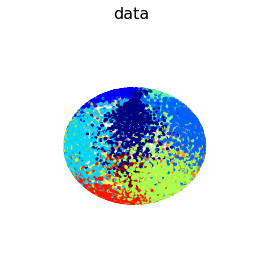

In [6]:
%matplotlib inline
ldle_obj.vis.data(X, labelsMat[:,0], 'data')

Using LDLE_1
A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 2500 points processed...
A_k, Atilde_k: 5000 points processed...
A_k, Atilde_k: 7500 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 2500 points processed...
local_param: 5000 points processed...
local_param: 7500 points processed...
local_param: all 10000 points processed...
After iter 1, max distortion is 18.506312
After iter 2, max distortion is 15.043498
After iter 3, max distortion is 15.043498
After iter 4, max distortion is 14.711511
After iter 5, max distortion is 14.711511
After iter 6, max distortion is 14.711511
After iter 7, max distortion is 14.711511
After iter 8, max distortion is 14.711511
Max local distortion = 14.711510602278768
###############
Took 74.0 seconds to perform step 1: construct low distoriton local views
###############

Clustering to obtain low distortion intermediate views

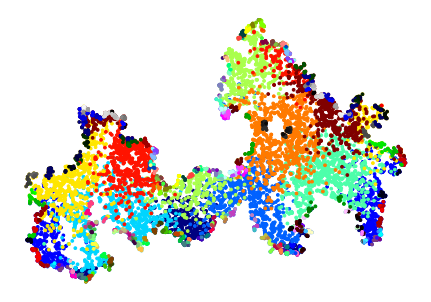

###############
Took 9.0 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.0009379157527944871


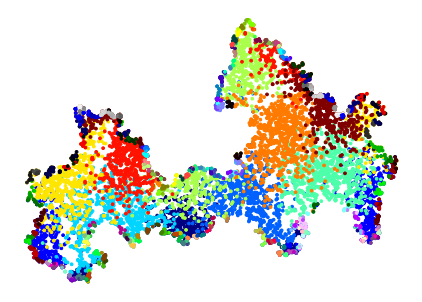

Iteration: 1
error: 0.0009296110715734301
Iteration: 2
error: 0.0009370130352266134
Iteration: 3
error: 0.0009782852247918208
Iteration: 4
error: 0.000986833501928084
Iteration: 5
error: 0.0010118593083410913


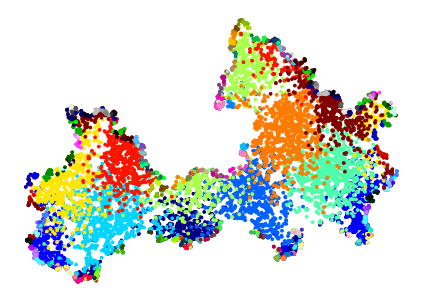

Iteration: 6
error: 0.0010046851111536353
Iteration: 7
error: 0.001013915108147629
Iteration: 8
error: 0.0010034577582812144
Iteration: 9
error: 0.0010126867910177785
Iteration: 10
error: 0.0010161509994960245


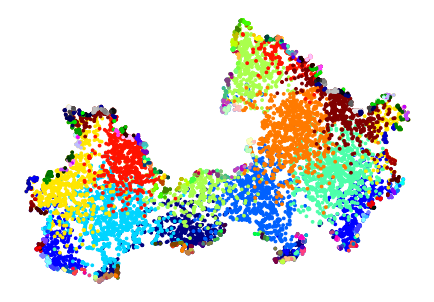

Iteration: 11
error: 0.0010140371573001332
Iteration: 12
error: 0.001005575146384614
Iteration: 13
error: 0.0010189865171773233
Iteration: 14
error: 0.0010254213500877664
Iteration: 15
error: 0.0010463815573329605


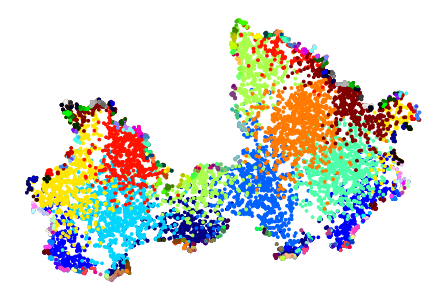

Iteration: 16
error: 0.001073348604386929
Iteration: 17
error: 0.0010730471593318868
Iteration: 18
error: 0.0010700532749758056
Iteration: 19
error: 0.0010645897958373777


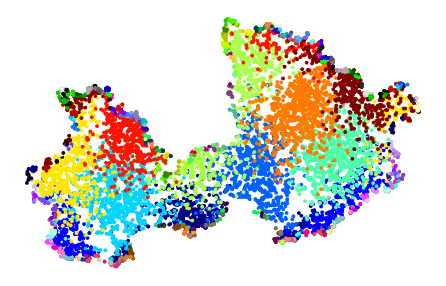

###############
Took 282.4 seconds to refine global embedding.
###############
###############
Took 294.0 seconds to perform step 3: compute global embedding.
###############


In [7]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [8]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

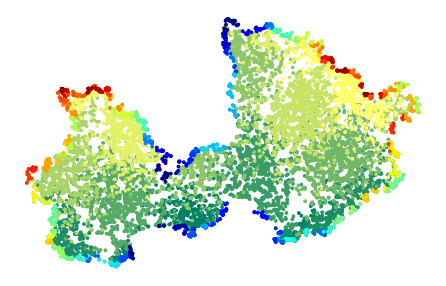

In [9]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,0], 'summer',
                             ldle_obj.color_of_pts_on_tear_final, 'jet', 'LDLE0_jet')

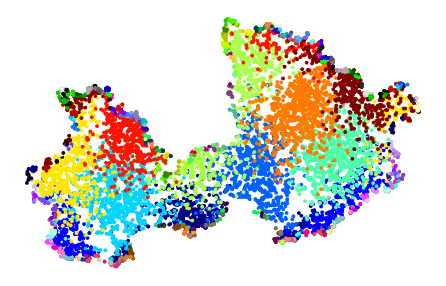

In [10]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,0], 'jet',
                             ldle_obj.color_of_pts_on_tear_final, 'colorcube', 'LDLE0_colorcube')

# LTSA

In [11]:
from matplotlib import pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

5


/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:936: LinAlgWarning: Diagonal number 853 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


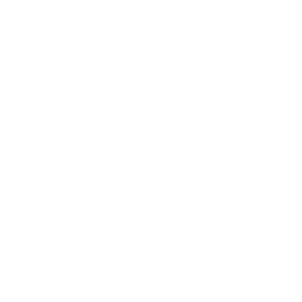

10


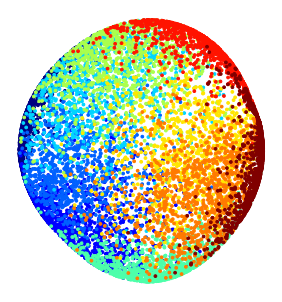

25


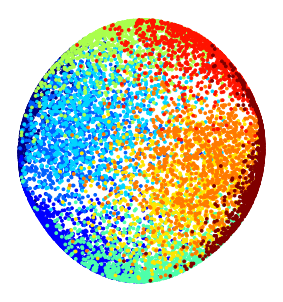

15


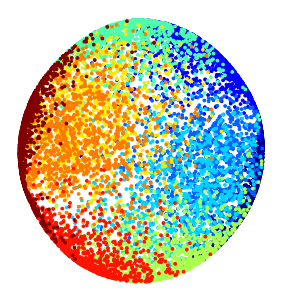

75


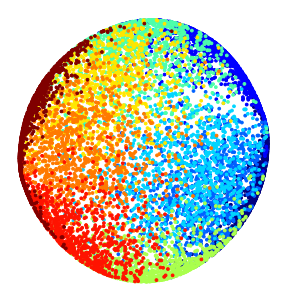

100


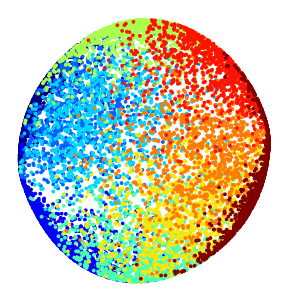

In [12]:
for n_neighbors in [5,10,25,15,75,100]:
    print(n_neighbors)
    ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=n_neighbors,
                                      n_components=2, n_jobs=-1, random_state=42)
    y_ltsa = ltsa_obj.fit_transform(X)
    vis.global_embedding(y_ltsa, labelsMat[:,0], 'jet', title='LTSA0_'+str(n_neighbors))
    plt.show()

# UMAP

In [13]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

25 0.01


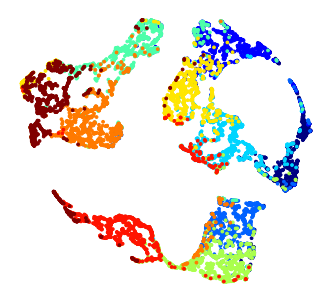

25 0.1


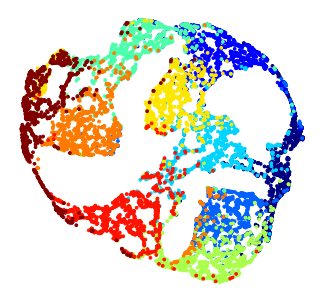

25 0.25


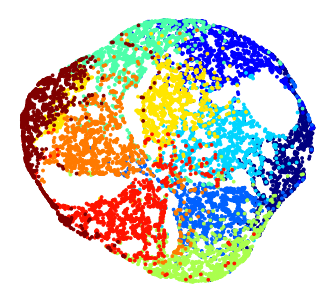

25 0.5


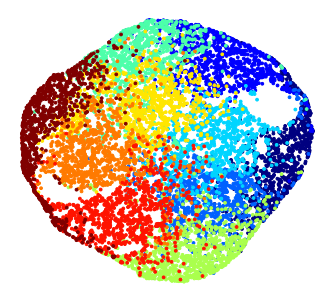

50 0.01


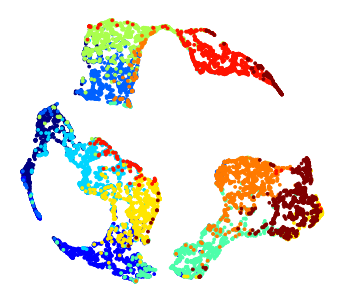

50 0.1


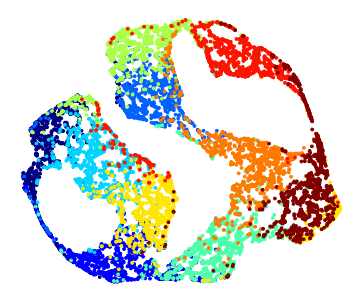

50 0.25


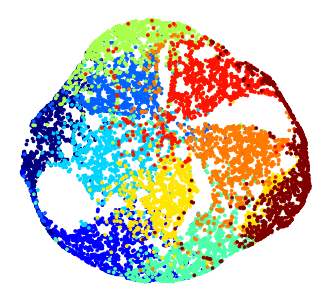

50 0.5


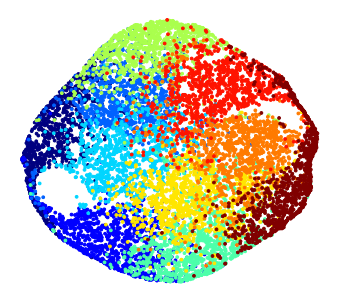

100 0.01


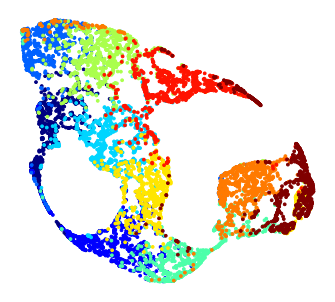

100 0.1


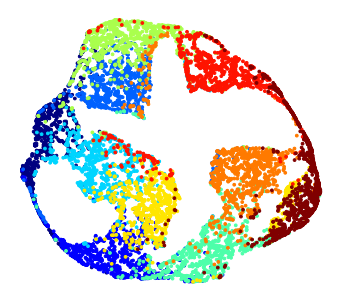

100 0.25


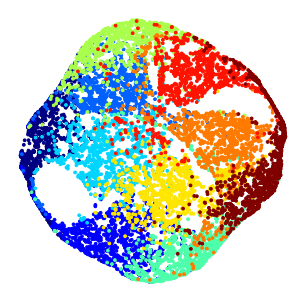

100 0.5


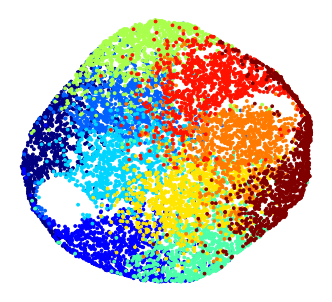

200 0.01


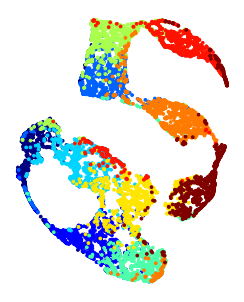

200 0.1


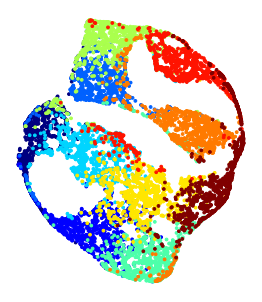

200 0.25


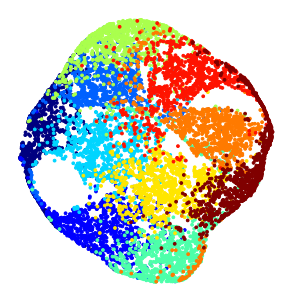

200 0.5


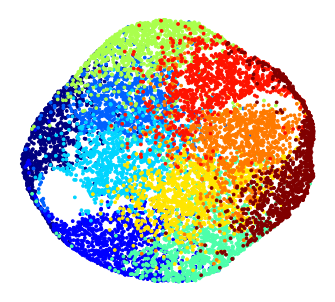

In [14]:
for n_neighbors in [25,50,100,200]:
    for min_dist in [0.01,0.1,0.25,0.5]:
        print(n_neighbors, min_dist)
        umap_obj = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2,
                        random_state=42, n_epochs=500, metric='euclidean')
        y_umap = umap_obj.fit_transform(X)
        vis.global_embedding(y_umap, labelsMat[:,0], 'jet', title='UMAP0_'+str(n_neighbors)+'_'+str(min_dist))
        plt.show()

# t-SNE

In [15]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

30 2


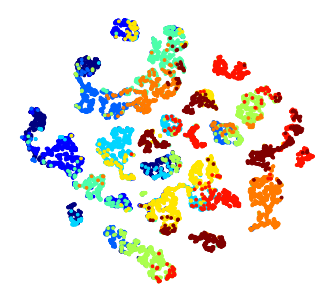

30 4


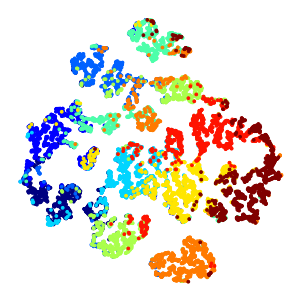

30 6


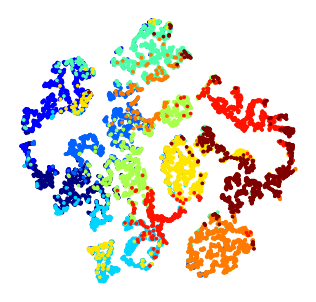

40 2


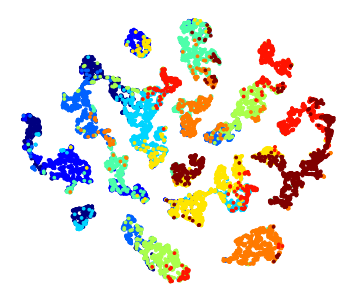

40 4


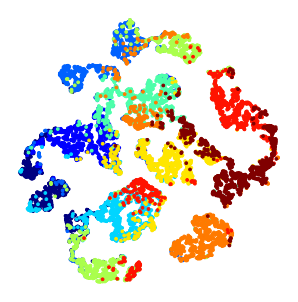

40 6


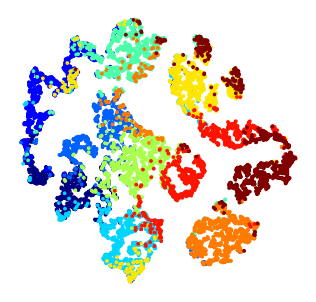

50 2


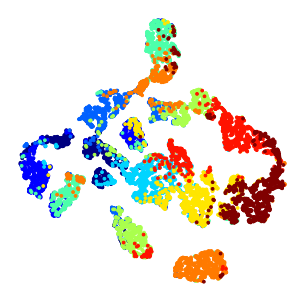

50 4


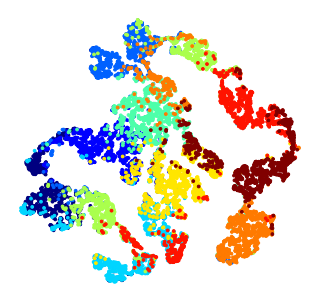

50 6


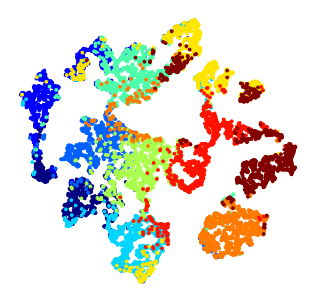

60 2


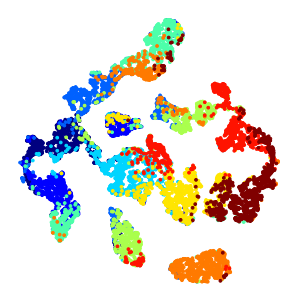

60 4


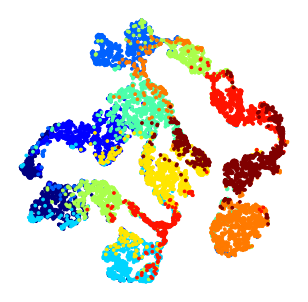

60 6


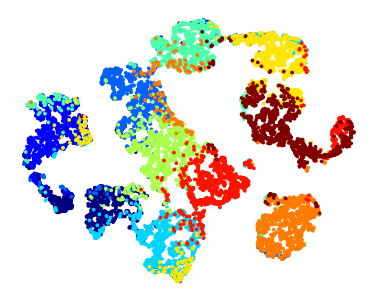

In [16]:
for perplexity in [30,40,50,60]:
    for ee in [2,4,6]:
        print(perplexity, ee)
        tsne_obj = TSNE(perplexity=perplexity, early_exaggeration=ee, n_components=2,
                        metric='euclidean', random_state=42, n_iter=1000,
                        n_jobs=-1, init='random')
        y_tsne = tsne_obj.fit_transform(X)
        vis.global_embedding(y_tsne, labelsMat[:,0], 'jet', title='t-SNE0_'+str(perplexity)+'_'+str(ee))
        plt.show()